# Mobile Range Classification

## Introduction
The data contains the following fields: ● Id : ID ● battery_power : Total energy a battery can store in one time measured in mAh ● blue : Has bluetooth or not ● clock_speed : speed at which microprocessor executes instructions ● dual_sim : Has dual sim support or not ● fc : Front Camera megapixels ● four_g : Has 4G or not ● int_memory : Internal Memory in Gigabytes ● m_dep : Mobile Depth in cm ● mobile_wt : Weight of mobile phone ● n_cores : Number of cores of processor ● pc : Primary Camera megapixels ● px_height: Pixel Resolution Height ● px_width: Pixel Resolution Width ● ram: Random Access Memory in Megabytes ● sc_h : Screen Height of mobile in cm ● sc_w : Screen Width of mobile in cm ● talk_time : longest time that a single battery charge will last when you are ● three_g : Has 3G or not ● touch_screen : Has touch screen or not ● wifi : Has wifi or not ● Price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [38]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#reading the dataset
df=pd.read_csv(r"C:\Users\AJAY SINGH\Desktop\CODEBASIC\ADDA247\ADDA@ Mobile.csv")
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

# EDA (Exploratory Data Analysis)

In [40]:
# Considering Train & test dataset

In [41]:
train=pd.read_csv(r"C:\Users\AJAY SINGH\Desktop\CODEBASIC\ADDA247\train.csv")
train.head(5)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [42]:
test=pd.read_csv(r"C:\Users\AJAY SINGH\Desktop\CODEBASIC\ADDA247\test.csv")
test.head(5)

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [43]:
print("No. of rows and columns in train data: ",train.shape)
print("No. of rows and columns in test data: ",test.shape)

No. of rows and columns in train data:  (2000, 21)
No. of rows and columns in test data:  (1000, 21)


In [44]:
# description of training set
train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

### Observation:

- The describe function describes the every aspect of the dataset provided.
- Minimum and maximum values, mean, count, standard deviation etc.

In [45]:
# info about the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [46]:
# null value count in training set
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Observation: Q1(c)

- There is no null/missing value in the trainng set.
- There is no null/missing value in the test set. 

# Visualisation

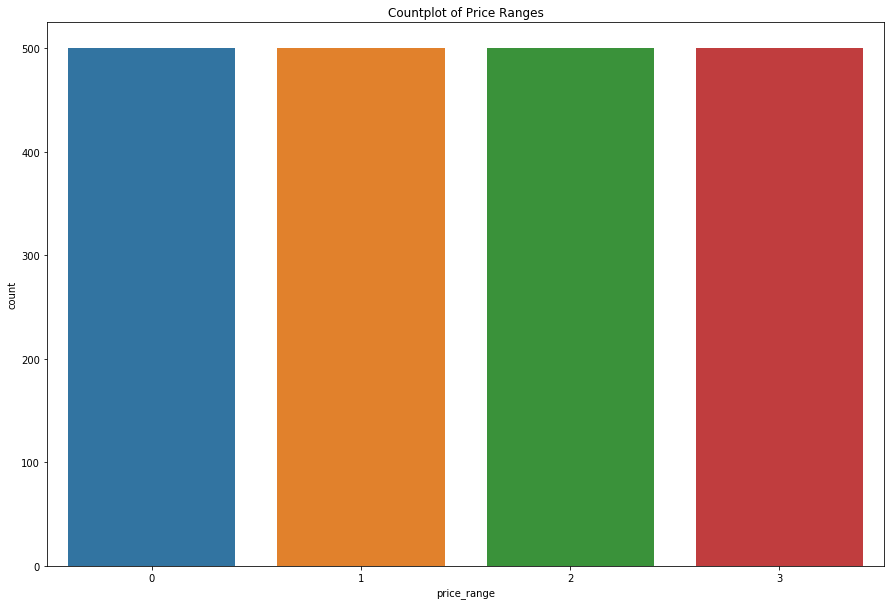

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(train['price_range'])
plt.title('Countplot of Price Ranges')
plt.show()

### Q1(b) 25% of each price range in the available train data & Dataset is balanced as it can be seen from the above plot i.e. equal distribution of classes of price_range

<function matplotlib.pyplot.show(*args, **kw)>

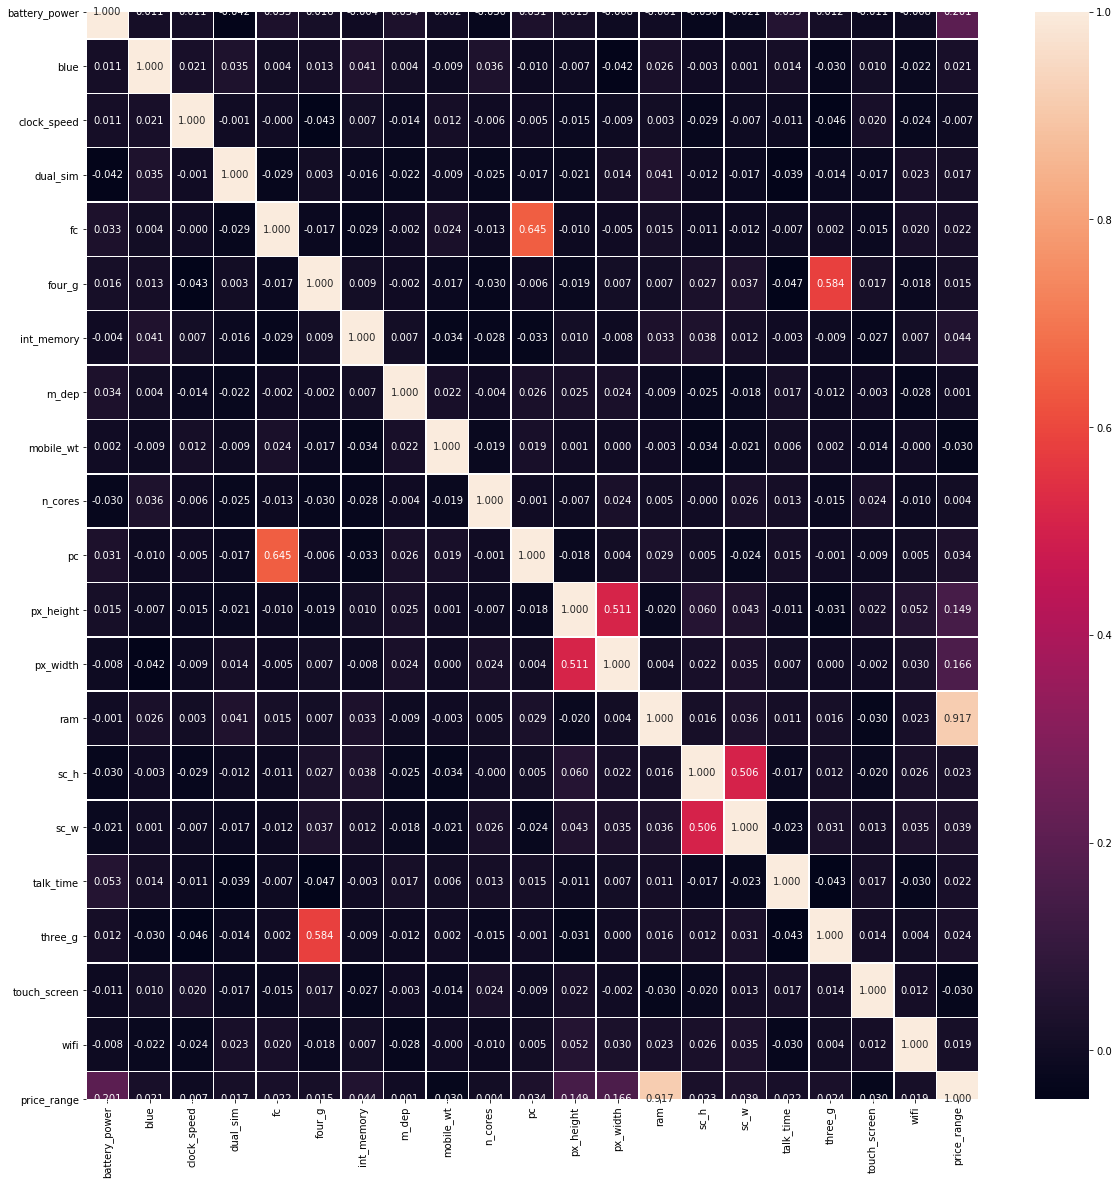

In [49]:
# correlation map
# higher correlations are brighter
corr = train.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.3f', ax=ax)
plt.show

### Q1(d) as we can see that relation between 'Ram' to 'Price_range' is highly positive compared with other features, Hence, this proves that the ‘ram’ of a mobile influences its price the most 
#### The above heatmap plot shows that data is positively correlated
#### Also 3G & 4G pc(primary camera megapixel) & fc(front camera mega pixel), pixel resolution width & height, screen width & height of mobile in cm features have highly positive correlation.

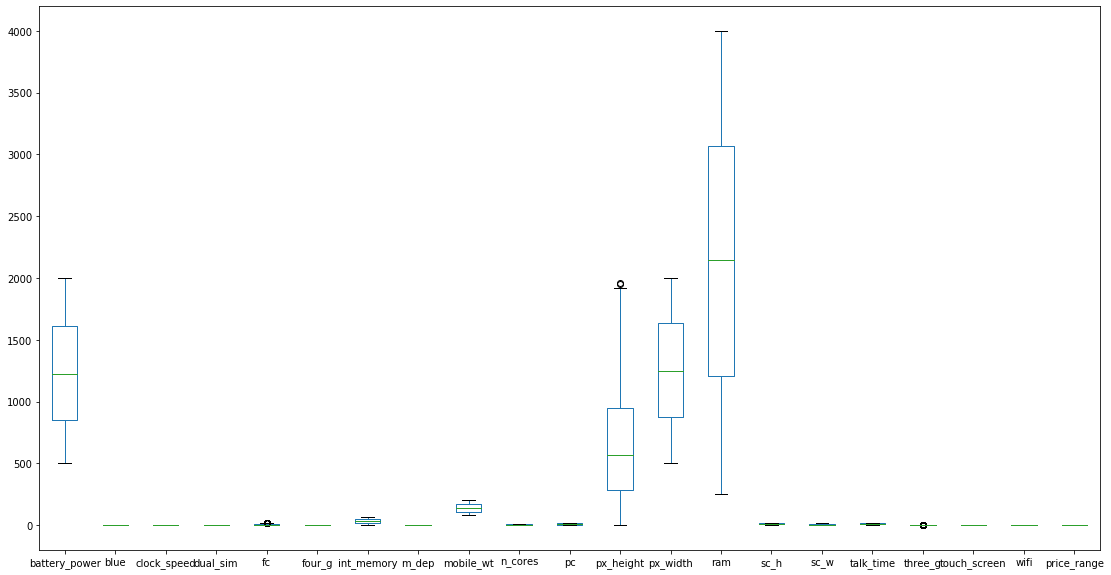

In [50]:
# For visualising outlier, Box plot to be used 
train.plot(kind='box',figsize=(19,10))
plt.show()

### Q1(f): From the above boxplot, we can easily see that the dark dots apart from the range of plotting is the outlier.

## Q1(e) From below plots we can see that the features which do not have linear relationship with price range

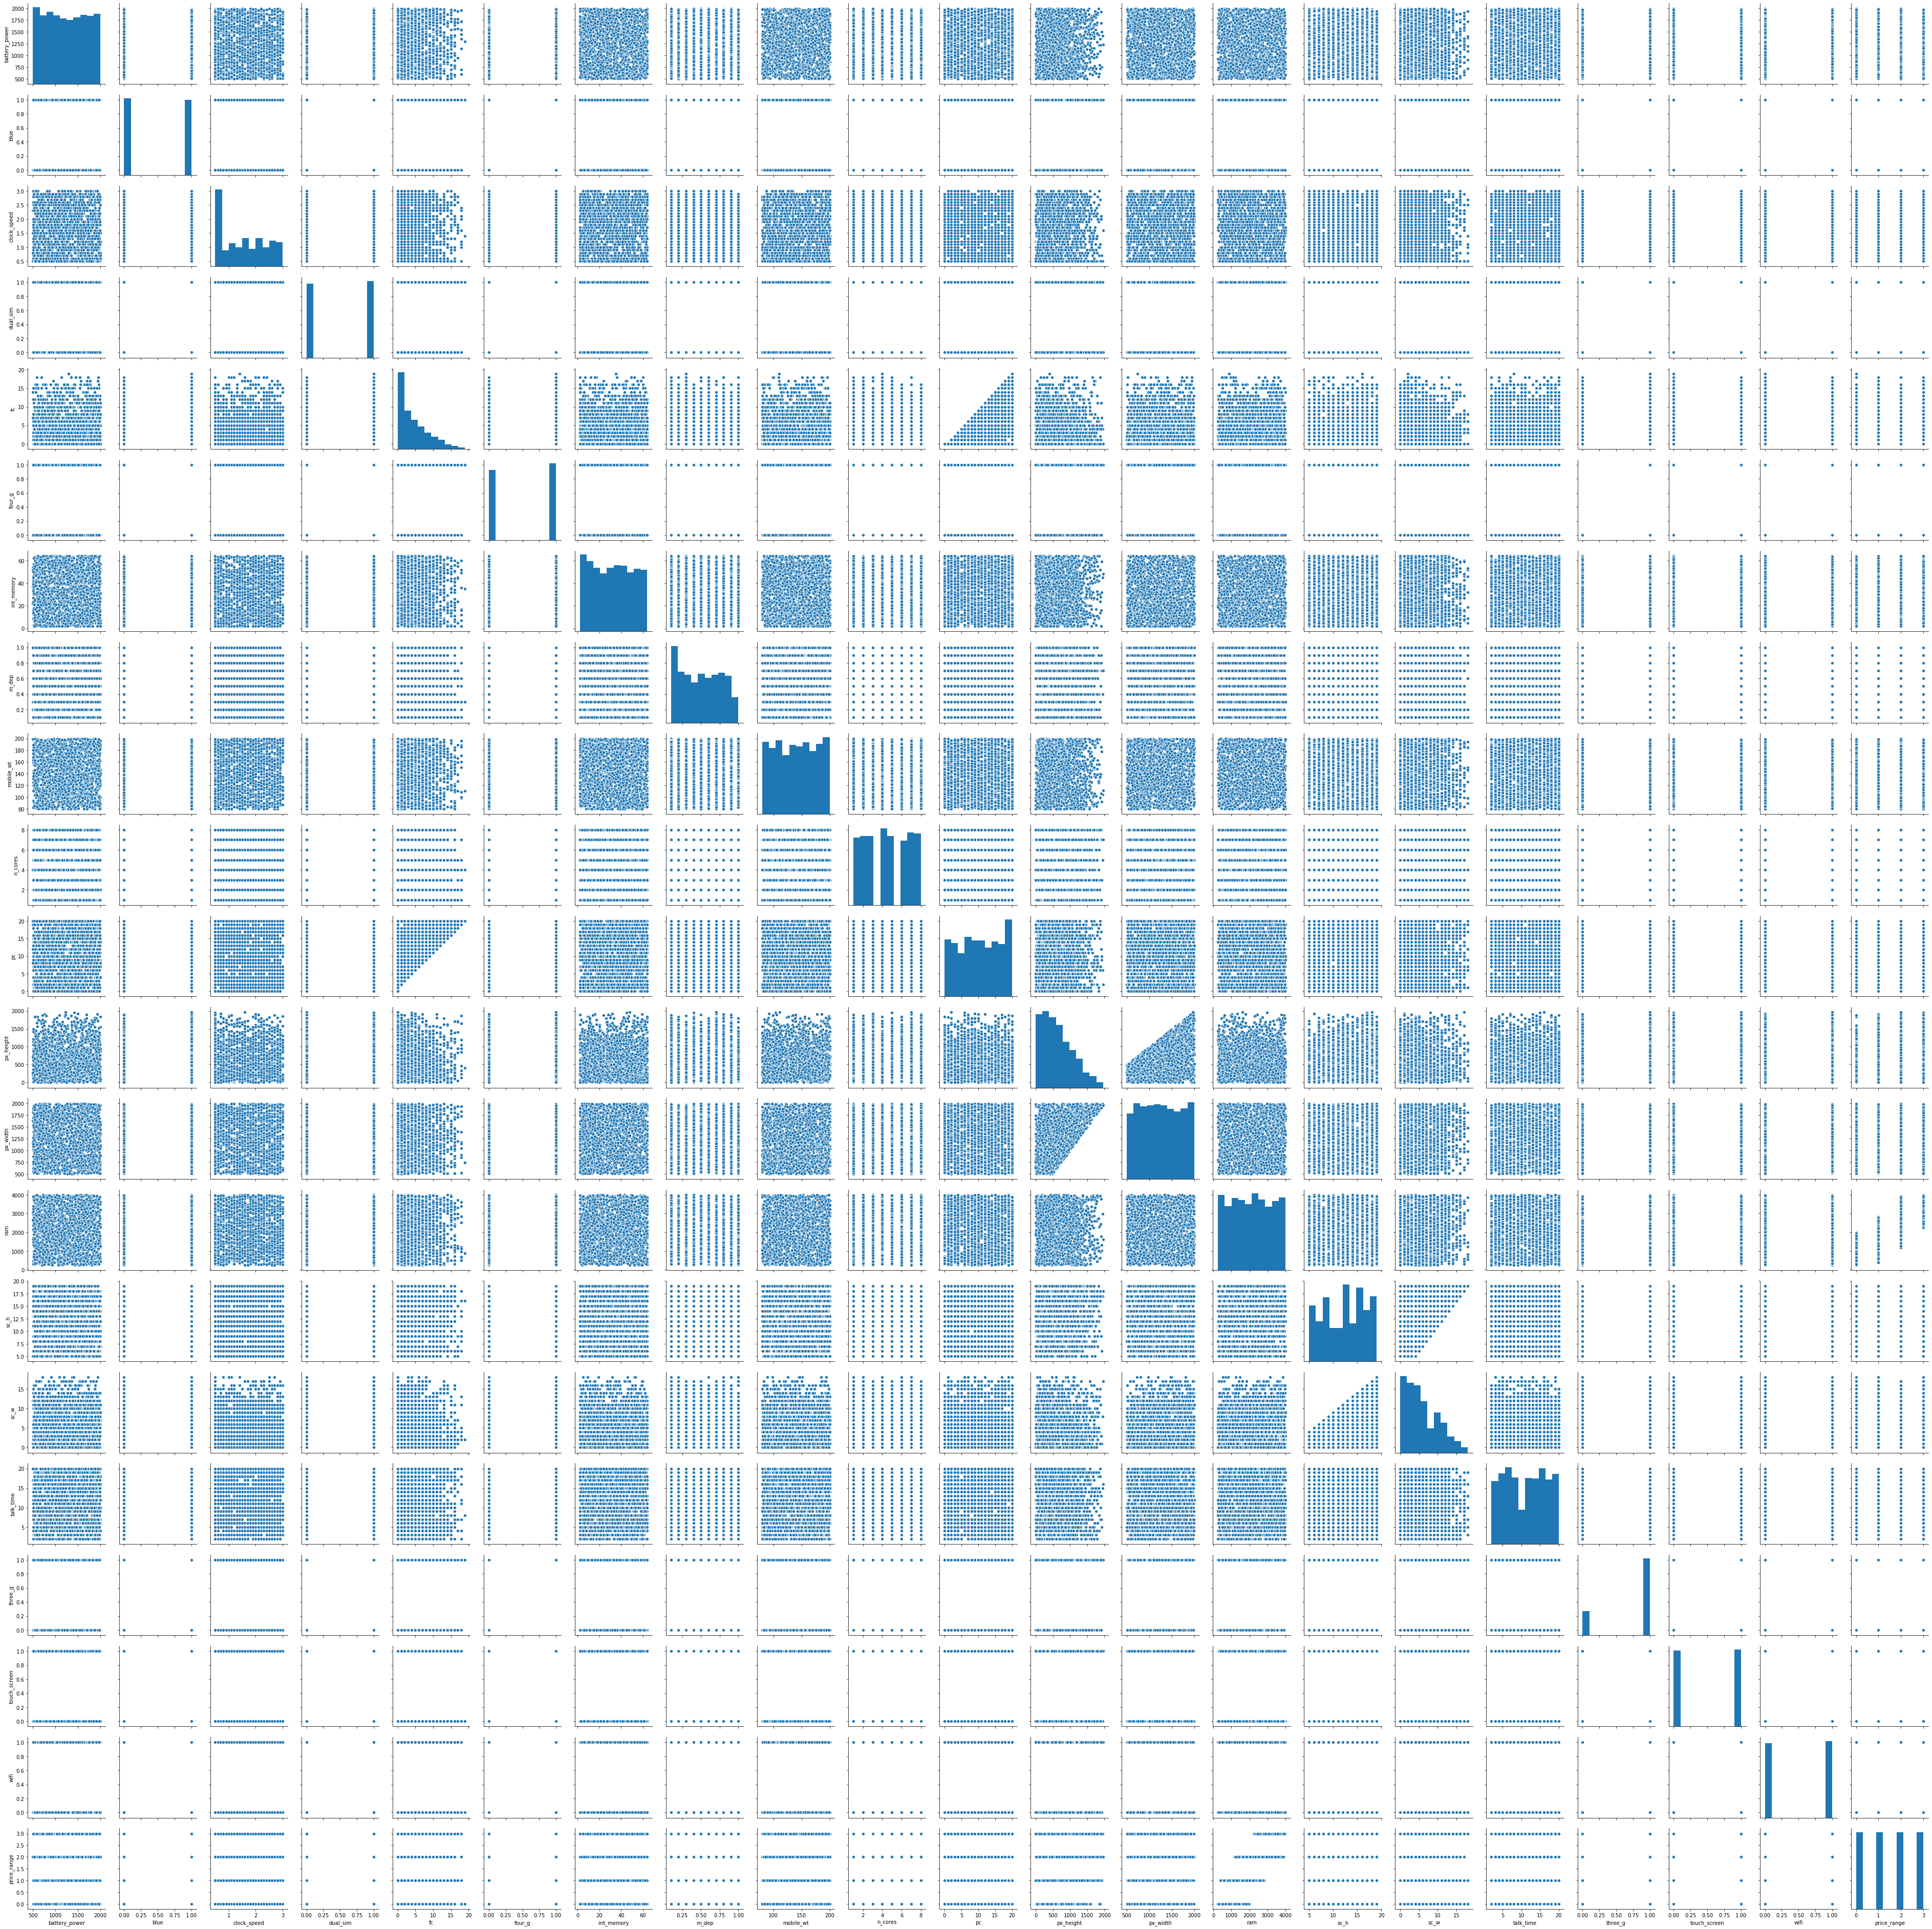

In [51]:
sns.pairplot(train)

## Q1(a) Below are those features which are categorical in nature

In [52]:
col_dummy=[]
col_std=[]
y=train['price_range']
train=train.drop('price_range',axis=1)
for col in list(train.columns):
    n=len(pd.unique(train[col]))
    print("Number of unique elements in the column: ",col," is:   ",n)
    if(n<5):
        col_dummy.append(col)
    else:
        col_std.append(col)
        
print("<<<==================================================>>>")
print("Columns for creating dummies: ",len(col_dummy))
print("Columns for standardisation: ",len(col_std))

Number of unique elements in the column:  battery_power  is:    1094
Number of unique elements in the column:  blue  is:    2
Number of unique elements in the column:  clock_speed  is:    26
Number of unique elements in the column:  dual_sim  is:    2
Number of unique elements in the column:  fc  is:    20
Number of unique elements in the column:  four_g  is:    2
Number of unique elements in the column:  int_memory  is:    63
Number of unique elements in the column:  m_dep  is:    10
Number of unique elements in the column:  mobile_wt  is:    121
Number of unique elements in the column:  n_cores  is:    8
Number of unique elements in the column:  pc  is:    21
Number of unique elements in the column:  px_height  is:    1137
Number of unique elements in the column:  px_width  is:    1109
Number of unique elements in the column:  ram  is:    1562
Number of unique elements in the column:  sc_h  is:    15
Number of unique elements in the column:  sc_w  is:    19
Number of unique elements 

#### There are features which are categorical

### Q2(a):  Segregation of the dependent column from the data frame

In [53]:
#creating dummy variables
train=pd.get_dummies(train,columns=col_dummy)
train.head()

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  pc  \
0            842          2.2   1           7    0.6        188        2   2   
1           1021          0.5   0          53    0.7        136        3   6   
2            563          0.5   2          41    0.9        145        5   6   
3            615          2.5   0          10    0.8        131        6   9   
4           1821          1.2  13          44    0.6        141        2  14   

   px_height  px_width  ...  dual_sim_0  dual_sim_1  four_g_0  four_g_1  \
0         20       756  ...           1           0         1         0   
1        905      1988  ...           0           1         0         1   
2       1263      1716  ...           0           1         0         1   
3       1216      1786  ...           1           0         1         0   
4       1208      1212  ...           1           0         0         1   

   three_g_0  three_g_1  touch_screen_0  touch_screen_1  wifi_0  wifi_1  
0          1          0               1               0       0       1  
1          0          1               0               1       1       0  
2          0          1               0               1       1       0  
3          0          1               1               0       1       0  
4          0          1               0               1       1       0  

[5 rows x 26 columns]

### Q3(a) standardising the dataset 

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train[col_std]=sc.fit_transform(train[col_std])
train.head()

battery_power  clock_speed        fc  int_memory     m_dep  mobile_wt  \
0      -0.902597     0.830779 -0.762495   -1.380644  0.340740   1.349249   
1      -0.495139    -1.253064 -0.992890    1.155024  0.687548  -0.120059   
2      -1.537686    -1.253064 -0.532099    0.493546  1.381165   0.134244   
3      -1.419319     1.198517 -0.992890   -1.215274  1.034357  -0.261339   
4       1.325906    -0.395011  2.002254    0.658915  0.340740   0.021220   

    n_cores        pc  px_height  px_width  ...  dual_sim_0  dual_sim_1  \
0 -1.101971 -1.305750  -1.408949 -1.146784  ...           1           0   
1 -0.664768 -0.645989   0.585778  1.704465  ...           0           1   
2  0.209639 -0.645989   1.392684  1.074968  ...           0           1   
3  0.646842 -0.151168   1.286750  1.236971  ...           1           0   
4 -1.101971  0.673534   1.268718 -0.091452  ...           1           0   

   four_g_0  four_g_1  three_g_0  three_g_1  touch_screen_0  touch_screen_1  \
0         1         0          1          0               1               0   
1         0         1          0          1               0               1   
2         0         1          0          1               0               1   
3         1         0          0          1               1               0   
4         0         1          0          1               0               1   

   wifi_0  wifi_1  
0       0       1  
1       1       0  
2       1       0  
3       1       0  
4       1       0  

[5 rows x 26 columns]

### Q2(b): Splitting the data

In [57]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(train,y,test_size=0.3,random_state=42)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(1400, 26) (1400,)
(600, 26) (600,)


### Q2 (c): Training the model on train data & prediction on test data 
## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param={'C':[0.01,0.1,1,10,100,110,120,130]}
m=GridSearchCV(LogisticRegression(max_iter=500),param,n_jobs=-1)
m.fit(xtrain,ytrain)
print("Suitable parameter for the model is: ",m.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Suitable parameter for the model is:  {'C': 100}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [64]:
# predicting the results
ypred=m.predict(xtest)
ypred

array([0, 2, 2, 3, 1, 2, 2, 0, 3, 1, 0, 0, 1, 3, 3, 2, 3, 3, 1, 0, 0, 1,
       2, 2, 0, 2, 3, 2, 2, 0, 0, 0, 3, 0, 2, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 1, 1, 3, 1, 3, 1, 0, 0, 1, 2, 1, 3, 0, 0, 1, 3, 3, 2, 0, 0,
       3, 3, 2, 2, 2, 1, 0, 1, 2, 0, 1, 3, 2, 1, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 0, 0, 1, 0, 1, 3, 2, 0, 2, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0,
       1, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       2, 1, 1, 2, 1, 3, 3, 3, 1, 2, 0, 0, 0, 1, 1, 1, 3, 1, 1, 2, 1, 1,
       3, 1, 3, 0, 0, 2, 1, 3, 0, 1, 1, 0, 1, 3, 2, 0, 1, 3, 3, 0, 2, 3,
       3, 3, 0, 3, 1, 1, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 2, 1, 3, 1, 1,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 2, 3, 3,

### Q2(d): To check the accuracy score and display confusion matrix

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy: ",accuracy_score(ytest,ypred)*100)
print("confusion matrix: \n",confusion_matrix(ytest,ypred))

Accuracy:  85.66666666666667
confusion matrix: 
 [[147   3   1   0]
 [  1 105  40   0]
 [  0  35 108   5]
 [  0   0   1 154]]


This logistic model would give more accuracy if the dataset would have splitted into 80:20 ratio.

### Q2(e): Is the model overfit or underfit?
#### Model is slightly underfit due to its accuracy, if it would have splitted by 80:20 ratio, it would have resulted into Good model

### Q3(b): Does the accuracy improve after standardisation?
#### Yes

## Q4: What are your findings from the exercise?
#### From describe function we can see alot of statistical data i.e. min, max, min, std etc. to take appropriateb  decision based on this. There was no null values in the data set. Dataset is balanced, i.e. equal distribution of mobiles in different price range. On the heatmap above it is clearly visible that Battery power, wifi, touch screen, etc. has no affect on price range whereas Ram has a good effect on price range of mobiles. 
Major findings is that I learnt alot of things while doing this assignment about how the accuracy changes based on splitting of train & test data values. Many real life scenrio problem can be solved by the similar approcehes, and can be very useful in predictig the final result by inputing the values in the trained model.

Thnaks & Regards        
Ajay Kumar Singh            
IIT(BHU) Varanasi